In [60]:
cd /home

/home


In [79]:
import matplotlib.pyplot as plt
import os 

from src.data import pretraining_pipeline

os.environ["CUDA_VISIBLE_DEVICES"] = "-1" # 

plt.rcParams.update({
    "text.usetex": True,
    "font.family": "sans-serif",
    "font.sans-serif": ["Helvetica"]})
# for Palatino and other serif fonts use:
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "font.serif": ["Palatino"],
})

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [164]:
dataset = pretraining_pipeline('./data/records/alcock/fold_0/alcock/test/',
                         batch_size=256,
                         window_size=200,
                         msk_frac=.5,
                         rnd_frac=.2,
                         same_frac=.2,
                         sampling=False,
                         shuffle=False,
                         repeat=1,
                         num_cls=None,
                         normalize='zero-mean', # 'None', 'minmax'
                         cache=True,
                         return_ids=False,
                         return_lengths=False,
                         nsp_prob=.5,
                         nsp_frac=.5,
                         moving_window=True,
                         nsp_test=False)

[INFO] Repeating dataset x1 times
[INFO] Loading PT task: Masking
[INFO] Loading PT task: RSP
[INFO] Mov. win:  True


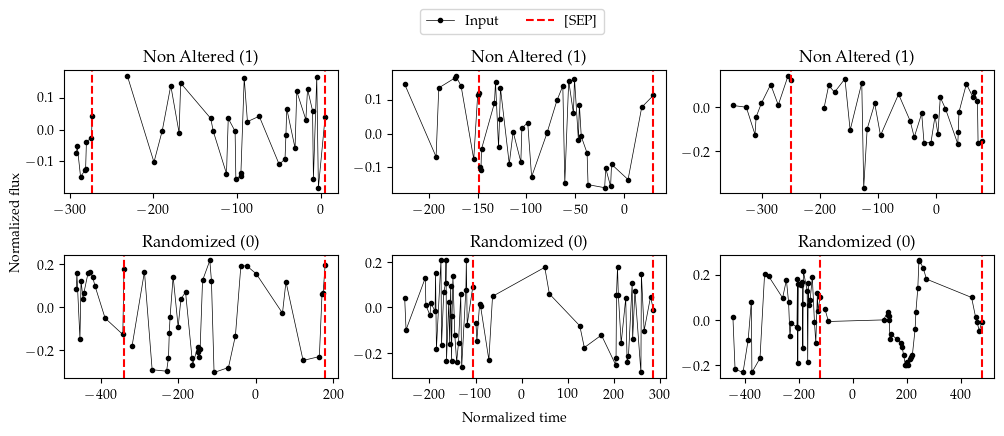

In [165]:
ncols = 3
nrows = 2
fig, axes = plt.subplots(nrows,ncols, sharey=False, sharex=False,
                         figsize=(12,4),
                         gridspec_kw={'hspace': 0.5, 'wspace': 0.2})

axes = axes.flatten()

k = 0
k_pos = 0
k_neg = 0
for x, y in dataset.unbatch():       
    
    if y['nsp_label'] == 0:
        k_neg +=1
        if k_neg > nrows*ncols/2:
            continue
    else:
        k_pos +=1
        if k_pos > nrows*ncols/2:
            continue
        
        
    init = 1
    for index in tf.where(x['input'] == -98):
        partial = x['input'][init:index[0]]
        partial_times = x['times'][init:index[0]]
        partial_mask = x['mask_in'][init:index[0]]
        x_mask = tf.boolean_mask(partial ,partial_mask)
        t_mask = tf.boolean_mask(partial_times , partial_mask)

        axes[k].plot(t_mask, x_mask, color='k', linestyle='-', linewidth=.5, marker='.')
        axes[k].axvline(x = t_mask[-1], 
                        color = 'r', 
                        linestyle='--')
        init = index[0]
        
    if y['nsp_label'] == 0:
        axes[k].set_title('Randomized (0)')
    else:
        axes[k].set_title('Non Altered (1)')
        
    k+=1
    if k > nrows*ncols:
        break
        
axes[0].legend(['Input', '[SEP]'], ncol=2, 
               bbox_to_anchor = (2, 1.55))

fig.text(0.5, 0., 'Normalized time', ha='center')
fig.text(0.08, 0.5, 'Normalized flux', va='center', 
         rotation='vertical')
fig.savefig('./presentation/figures/rsp_input.pdf', 
            format='pdf', bbox_inches='tight')